In [1]:
#pip install yfinance
#pip install yfinance pandas matplotlib

#  "The Impact of Electric Cars on the Gasoline Car Market."


# Hypothesis:

The widespread adoption of electric cars will lead to a significant reduction in the demand for gasoline cars, resulting in a noticeable decline in the gasoline car market share over time.

# **Reasearch question**

1.How does the stock market correlation data reflect the impact of the electric vehicle sector's growth on traditional gasoline-powered automobile manufacturers?

2.How do investment trends differ between EV companies and traditional car manufacturers, as indicated by trading volumes on Yahoo Finance?

3.How has the rise of EVs affected the sales and market share of gasoline cars in recent years?




# **collect data from yahoo finance**

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

tickers = ['TSLA', 'NIO', 'LCID', 'LI', 'XPEV','BYD', 'MBG.DE', 'NSANY', 'GM','TM']

# **cleaning data from yahoo finance**

In [3]:

data = {ticker: yf.download(ticker, start="2020-01-01", end="2023-12-31") for ticker in tickers}

for ticker, df in data.items():
    print(f"Ticker: {ticker}")
    
    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values)
    print("Data types:\n", df.dtypes)
    print("\n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Ticker: TSLA
Missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data types:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


Ticker: NIO
Missing va

# How does the stock market correlation data reflect the impact of the electric vehicle sector's growth on traditional gasoline-powered automobile manufacturers?


[*********************100%%**********************]  10 of 10 completed


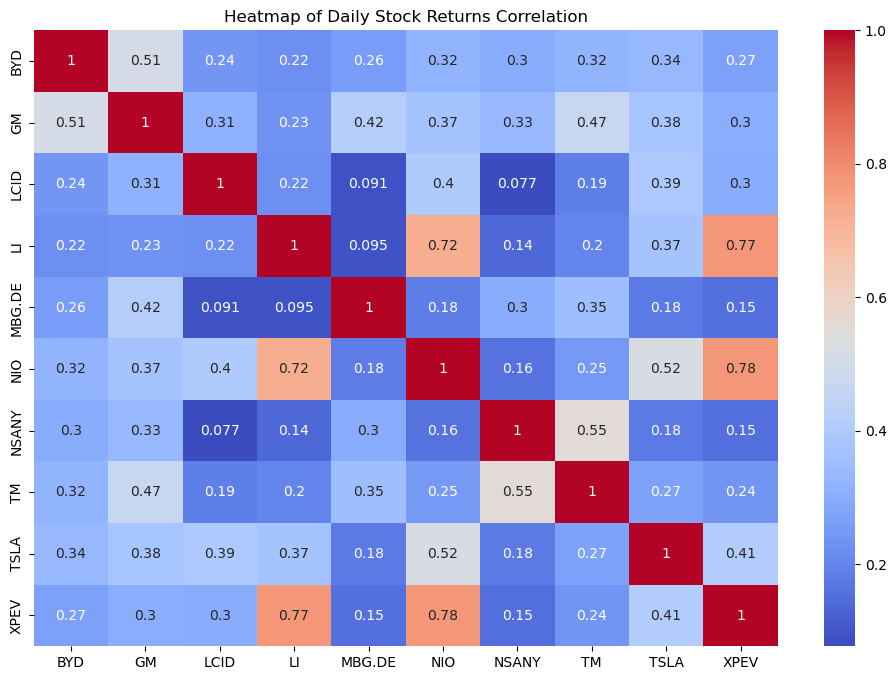

In [4]:
start_date = '2020-01-01'
end_date = '2023-12-31'

# Fetching the stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Use only closing prices
closing_prices = stock_data['Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Drop any NaN values that may have been generated
daily_returns = daily_returns.dropna()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Daily Stock Returns Correlation')
plt.show()


**The financial interactions between traditional gasoline-powered automobile manufacturers and electric vehicle (EV) companies are depicted in the heatmap of stock return correlations. Strong positive correlations amongst EV businesses such as NIO, XPEV, and LI indicate that the rapidly growing EV market frequently moves in lockstep, perhaps in response to news from the industry, developments in technology, or changes in investor sentiment toward renewable energy. On the other hand, there is variation in the correlations between these EV stocks and traditional automakers such as GM and TM, suggesting a less consistent reaction to shifts in the market.This may indicate how the market perceives the EV industry as a promising growth area, possibly at the expense of sales of conventional gasoline-powered vehicles. The heatmap highlights the complicated competitive dynamics as the automotive industry pivots towards electrification, even while it does not reveal a clear negative link. It does, however, suggest that the rise of EVs has a nuanced impact on the valuation of established gasoline vehicle firms.**

# **How do investment trends differ between EV companies and traditional car manufacturers, as indicated by trading volumes on Yahoo Finance?**


In [5]:
years = [2020, 2021, 2022, 2023]

total_volumes = pd.DataFrame(index=tickers, columns=years)

for ticker in tickers:
    for year in years:
        stock_data = yf.download(ticker, start=f'{year}-01-01', end=f'{year}-12-31')
        total_volume = stock_data['Volume'].sum()
        total_volumes.at[ticker, year] = total_volume

total_volumes


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,2020,2021,2022,2023
TSLA,57009787500,20667337800,21821019600,32157131400
NIO,27620985400,17013109000,15166162800,11559110300
LCID,89985700,10222033500,6071685800,7370044500
LI,2033105000,3255233400,2771773700,1564610500
XPEV,2212899900,3700656700,4551656000,3588695400
BYD,488019100,299063500,270279700,196804600
MBG.DE,1351372204,780221062,766570126,584210524
NSANY,41856000,25755400,32584300,18644300
GM,3880863500,4815837800,4145001600,3499522000
TM,53758200,70869800,65143900,64700000


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


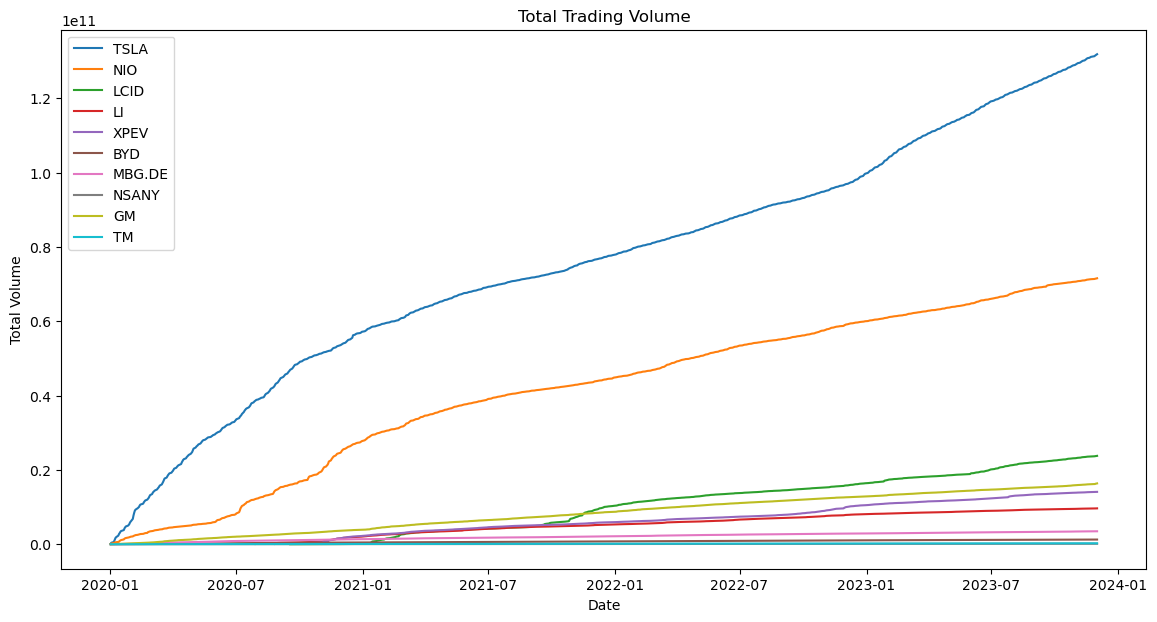

In [6]:
start_date = '2020-01-01'
end_date = '2023-12-31'

volume_data = {}

for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    volume_data[ticker] = stock_data['Volume']

plt.figure(figsize=(14, 7))

for ticker in tickers:
    plt.plot(volume_data[ticker].index, volume_data[ticker].cumsum(), label=ticker)

plt.title('Total Trading Volume')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.show()


**Total trading volume for a company is all about how many of its shares are traded during a certain time. Investors really pay attention to this because it shows how much action there is with that stock and how interested people are in it. It's not about how much money the company makes or its profits, but more about what's happening with its shares in the stock market.**

**As you can see from the graph, in the past three years, the top three companies with the highest total trading volumes are in the electric vehicle (EV) sector. This shows a significant shift in investor interest towards EV companies over traditional gasoline ones. The high trading volumes for these EV companies reflect a growing trend and an increased focus on the potential and future of electric vehicles in the market.**
 

# **collect data from each company website**
source data:

https://ir.tesla.com/press-release/tesla-vehicle-production-deliveries-and-date-financial-results-webcast-third-quarter-2023

https://ir.nio.com/news-events/news-releases

https://ir.lucidmotors.com/news-releases/news-release-details/lucid-announces-q3-production-deliveries-sets-date-third-quarter

https://www.press.bmwgroup.com/usa/article/detail/T0437448EN_US/bmw-of-north-america-reports-q3-2023-u-s-sales-results?language=en_US#:~:text=BMW%20delivered%2013%2C079%20battery%20electric,volume%20year%2Dto%2Ddate.

https://www.audi-mediacenter.com/en/press-releases/audi-group-good-performance-in-the-first-half-of-the-year-despite-major-challenges-15496

https://ir.xiaopeng.com/news-releases/news-release-details/xpeng-announces-vehicle-delivery-results-august-2023

https://group.mercedes-benz.com/investors/reports-news/interim-reports/q3-2023/

In [7]:
sale = pd.read_csv('sale.csv')
sale.shape

(15, 10)

# **cleaning data that from each company website**

In [8]:

numeric_columns_new = ['TESLA', 'NIO', 'XPENG', 'LI', 'LUCID', 'BMW', 'MBG.DE', 'BYD','AUDI']
for col in numeric_columns_new:
    if sale[col].dtype == object:
        sale[col] = pd.to_numeric(sale[col].str.replace(',', ''), errors='coerce')

sale.fillna(sale.mean(numeric_only=True), inplace=True)
missing_values_after_cleaning = sale.isnull().sum()

data_types_after_cleaning = sale.dtypes

missing_values_after_cleaning, data_types_after_cleaning

#sale.head()


(Date      0
 TESLA     0
 NIO       0
 XPENG     0
 LI        0
 LUCID     0
 BMW       0
 MBG.DE    0
 BYD       0
 AUDI      0
 dtype: int64,
 Date       object
 TESLA       int64
 NIO       float64
 XPENG       int64
 LI          int64
 LUCID     float64
 BMW         int64
 MBG.DE      int64
 BYD         int64
 AUDI        int64
 dtype: object)

# **How has the rise of EVs affected the sales and market share of gasoline cars in recent years?**



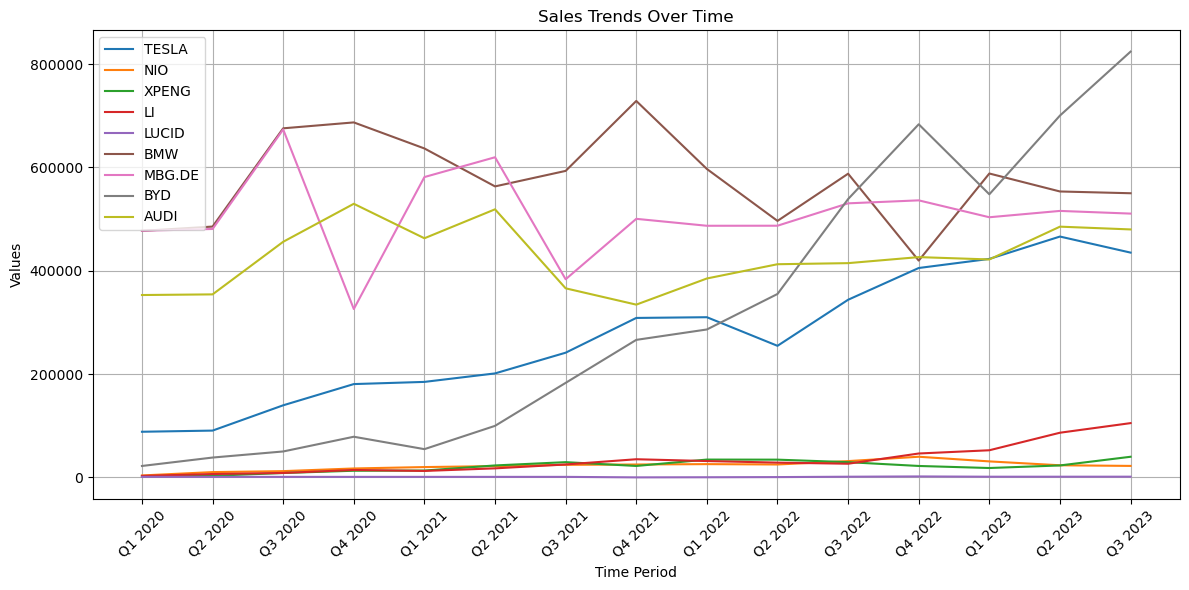

In [9]:
sale.fillna(sale.mean(numeric_only=True), inplace=True)

numeric_columns_new = sale.columns[1:]  
if sale[col].dtype == 'object':
    sale[col] = pd.to_numeric(sale[col].str.replace(',', ''), errors='coerce')


plt.figure(figsize=(12, 6))
time_periods = sale.iloc[:, 0]

for col in numeric_columns_new:
    plt.plot(time_periods, sale[col], label=col)

plt.xlabel('Time Period')
plt.ylabel('Values')
plt.title('Sales Trends Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


**As mentioned in response to question 1, the electric vehicle (EV) industry's growing overall trading volume is a reliable predictor of future growth. This pattern implies that investors are becoming increasingly optimistic about the EV market, which is consistent with projections of rising demand and profits. A gain in this area might be interpreted as encouraging news for the growth of the EV business because trading volumes are frequently correlated with investor interest and market confidence.**

**The increase in trade volume and the present market trends, which indicate that EV companies are reporting higher sales, suggest that EVs will likely become more common in the future. Technological developments, lower production costs, more consumer knowledge of and desire for sustainable transportation options all contribute to this change. But it's crucial to remember that the automotive sector is complicated and impacted by a number of variables, such as the state of the economy, shifts in regulations, and advances in technology, all of which may have an impact on the rate and kind of this expansion.**

# conclusion 

**Based on the data we have collected thus far, it is evident that electric vehicle (EV) companies have indeed had an impact on the gasoline car market. While the gasoline car market has not seen an immediate and significant decline in sales, there are notable trends and factors to consider.**

**Firstly, it is clear that electric vehicle companies have garnered substantial attention from investors and consumers alike. This increased interest in electric vehicles is indicative of a growing shift in consumer preferences and environmental awareness. The consistent growth in the electric vehicle market and the investments pouring into EV technology suggest that this trend is likely to continue in the foreseeable future.**

**Although the gasoline car market has not experienced an abrupt downturn, it is important to recognize that the electric vehicle market is still in its early stages of widespread adoption. As EV technology advances and becomes more accessible, we can expect a more pronounced impact on gasoline car sales.**

**In conclusion, while the gasoline car market has not been severely disrupted as of now, the rise of electric vehicles has undeniably shifted the landscape of the automotive industry. With increasing investor attention and continuous growth in electric vehicle sales, the gasoline car market should be prepared for potential challenges in the coming years as electric vehicles continue to gain traction and influence consumer choices.**